<a href="https://colab.research.google.com/github/ulubeykhuja/Amaliyot/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%2216_REGRESSIYA_16_18_YAKUNIY_AMALIY_VAZIFA_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Imgur](https://i.imgur.com/h4PPC71.png)
#**16-modul. Regressiya (Regression)**
# 16.18. Modul boʻyicha yakuniy amaliy vazifa
**Bu vazifa orqali real maʼlumotlarni tozalash, tahlil qilish, regressiya modellari qurish va ularni (MSE, R²) yordamida baholab, eng mos modelni tanlash koʻnikmalariga ega boʻlasiz.**

#**AMALIYOT: yurak kasalligi xavfini bashorat qilish**
#**Vazifa shartlari**

Sizga **Heart Disease Data** dataset beriladi. Bu datasetda bemorlarning turli tibbiy ko‘rsatkichlari (yosh, qon bosimi, xolesterin miqdori va h.k.) mavjud. Maqsad – turli regressiya modellari yordamida **yurak kasalligi (target ustuni)** ehtimolini oldindan bashorat qilish.

#### **1. Ma’lumotlarni yuklash va tahlil qilish**
- **Ma’lumotlarni tozalang**, yetishmayotgan qiymatlar bo‘lsa, ularni to‘g‘rilang.  
- Ustunlar orasidagi **korrelyatsiyani tahlil qiling** va eng muhim omillarni aniqlang.

#### **2. Chiziqli regressiya (Simple Linear Regression)**
- Yurak kasalligi xavfiga eng katta ta’sir ko‘rsatadigan **bitta muhim ustunni** tanlang.  
- Shu ustun asosida **simple linear regression** modeli tuzing.  
- Model natijalarini vizuallashtiring (Matplotlib yoki Seaborn).

#### **3. Ko‘p o‘zgaruvchili regressiya (Multiple Linear Regression)**
- Yurak kasalligi ehtimolini bashorat qilish uchun **bir nechta o‘zgaruvchini tanlang**.  
- **Multiple Linear Regression** modelini qurib, **MSE, R²** kabi baholash mezonlarini hisoblang.  
- Model natijalarini interpretatsiya qiling.

#### **4. Polynomial Regression**
- Yurak kasalligi xavfi va qon bosimi o‘rtasida chiziqli bog‘liqlik yetarli bo‘lmasa, **Polynomial Regression** yordamida bashoratni yaxshilang.  
- **Polynomial darajasini** mos ravishda tanlab, overfitting va underfitting muammolarini tahlil qiling.

#### **5. Non-linear Regression (curve_fit)**
- Yurak kasalligi ehtimolini model qilish uchun nolinear bog‘liqlik mavjudligini aniqlang.  
- `scipy.optimize.curve_fit` funksiyasidan foydalangan holda **eksponensial yoki logaritmik model** tuzing.  
- Modelni baholash uchun **MSE yoki MAE**ʼdan foydalaning.

#### **6. Modelni tanlash va solishtirish**
- Turli regressiya modellarini taqqoslab, **qaysi biri eng yaxshi natija berganini aniqlang**.  

---

### **Bu vazifani bajarish sizga nima beradi?**  
Ushbu vazifa sizga real tibbiy ma’lumotlar bilan ishlash imkoniyatini yaratadi. Regressiya modellarni solishtirib, **qaysi model kasallik xavfini yaxshi bashorat qilishini** aniqlaysiz.  



Ushbu **Heart Disease Data** datasetida quyidagi ustunlar mavjud. Har bir ustunning ma’nosi va qanday turdagi ma’lumot ekanini tushuntirib o‘tamiz:  

---

### **Ustunlar tavsifi**  

| **Ustun nomi**  | **Tavsifi** | **Ma’lumot turi** |
|-----------------|------------|-------------------|
| **age**         | Bemorning yoshi | Raqamli (Integer) |
| **sex**         | Jinsi (Male = erkak, Female = ayol) | String |
| **cp** (Chest Pain Type) | Ko‘krak qafasidagi og‘riq turi: <br> - 1: Typical Angina <br> - 2: Atypical Angina <br> - 3: Non-anginal Pain <br> - 4: Asymptomatic | Nominal (1,2,3,4) |
| **trestbps** (Resting Blood Pressure) | Dam olish vaqtida qon bosimi (mm Hg) | Raqamli |
| **chol** (Cholesterol) | Qondagi umumiy xolesterin miqdori (mg/dl) | Raqamli |
| **fbs** (Fasting Blood Sugar) | Qondagi shakar darajasi (≥ 120 mg/dl bo‘lsa, True, aks holda False) | Boolean (0/1) |
| **restecg** (Resting ECG) | Yurakning elektrokardiogramma natijasi: <br> - 0: Normal <br> - 1: ST-T Wave abnormality <br> - 2: Left Ventricular Hypertrophy | Nominal (0,1,2) |
| **thalach** (Max Heart Rate) | Maksimal yurak urish tezligi | Raqamli |
| **exang** (Exercise-Induced Angina) | Mashq qilish davomida angina bo‘ladimi? (1 = Ha, 0 = Yo‘q) | Boolean (0/1) |
| **oldpeak** | ST depressiyasi: EKG bo‘yicha yurakning dam olish va mashqdan keyingi o‘zgarishi | Raqamli |
| **slope** | ST segmentining tendensiyasi: <br> - 0: Downsloping <br> - 1: Flat <br> - 2: Upsloping | Nominal (0,1,2) |
| **ca** | Tomirlardagi kalsiy miqdori (0–3 oralig‘ida) | Raqamli |
| **thal** | Thalassemia turi: <br> - 1 = Normal <br> - 2 = Fixed defect <br> - 3 = Reversible defect | Nominal (1,2,3) |
| **num** | Yurak kasalligi mavjudligi ([0,1,2,3,4]) | Raqamli |

**num** ustunidagi raqamlar maʼnosi:

| `num` qiymati | Ma’nosi |
|--------------|--------|
| **0**  | Yurak kasalligi yo‘q |
| **1**  | Yengil darajadagi yurak kasalligi |
| **2**  | O‘rta darajadagi yurak kasalligi |
| **3**  | Og‘ir darajadagi yurak kasalligi |
| **4**  | Juda og‘ir yurak kasalligi |



###*** ESLATMA**. *Ushbu amaliy vazifada siz oʻtmagan mavzulardan ham savollar va vazifalar boʻlishi mumkin! Bu savollarni mustaqil oʻrganishingiz kerak boʻladi. Bunday vazifalar mustaqil izlanish koʻnikmangizni oshirish uchun tayyorlandi!*

In [ ]:
import pandas as pd
import numpy as np
import sklearn

url = "https://raw.githubusercontent.com/alishermutalov/praktikum-datasets/refs/heads/praktikum/heart_disease_uci_dataset.csv"
df = pd.read_csv(url, index_col='id')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
id,,,,,,,,,,,,,,
1,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
2,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
3,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
4,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
5,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


1. Ma’lumotlarni yuklash va tahlil qilish
Ma’lumotlarni tozalang, yetishmayotgan qiymatlar bo‘lsa, ularni to‘g‘rilang.
Ustunlar orasidagi korrelyatsiyani tahlil qiling va eng muhim omillarni aniqlang.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 920 entries, 1 to 920
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   cp        920 non-null    object 
 3   trestbps  861 non-null    float64
 4   chol      890 non-null    float64
 5   fbs       830 non-null    object 
 6   restecg   918 non-null    object 
 7   thalch    865 non-null    float64
 8   exang     865 non-null    object 
 9   oldpeak   858 non-null    float64
 10  slope     611 non-null    object 
 11  ca        309 non-null    float64
 12  thal      434 non-null    object 
 13  num       920 non-null    int64  
dtypes: float64(5), int64(2), object(7)
memory usage: 107.8+ KB


In [ ]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [ ]:
print(df.shape)
print(df.columns)

(920, 14)
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')


In [ ]:
df.isnull().sum()/len(df)*100

,0
age,0.000000
sex,0.000000
cp,0.000000
trestbps,6.413043
chol,3.260870
fbs,9.782609
restecg,0.217391
thalch,5.978261
exang,5.978261
oldpeak,6.739130


In [ ]:
df.drop(columns=['ca', 'thal', 'slope'], inplace=True)

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()/len(df)*100

,0
age,0.0
sex,0.0
cp,0.0
trestbps,0.0
chol,0.0
fbs,0.0
restecg,0.0
thalch,0.0
exang,0.0
oldpeak,0.0


In [ ]:
df.shape

(740, 11)

In [ ]:
df['sex'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
# cetegoriya to numeric
df['sex'] = df['sex'].map({'Male':1, 'Female': 2})

In [ ]:
df['restecg'].unique()

array(['lv hypertrophy', 'normal', 'st-t abnormality'], dtype=object)

In [ ]:
df['cp'] = df['cp'].map({'typical angina':1, 'atypical angina':2,
                         'non-anginal pain':3, 'asymptomatic':4})
df['restecg'] = df['restecg'].map({'normal':0, 'st-t abnormality':1, 'lv hypertrophy':2})

restecg (Resting ECG)
Yurakning elektrokardiogramma natijasi:
- 0: Normal
- 1: ST-T Wave abnormality
- 2: Left Ventricular Hypertrophy	Nominal (0,1,2)

In [ ]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,num
age,1.000000,-0.032852,0.222952,0.251817,-0.068419,0.223890,0.211845,-0.367020,0.234188,0.251741,0.353238
sex,-0.032852,1.000000,-0.163935,-0.012906,0.179650,-0.072285,0.024622,0.168457,-0.186028,-0.110612,-0.250919
cp,0.222952,-0.163935,1.000000,0.028609,-0.094041,0.029385,0.062193,-0.393569,0.465949,0.257695,0.418318
trestbps,0.251817,-0.012906,0.028609,1.000000,0.060759,0.160054,0.079375,-0.121594,0.180908,0.182027,0.153873
chol,-0.068419,0.179650,-0.094041,0.060759,1.000000,0.034016,0.085242,0.196281,-0.065146,0.060660,-0.193968
fbs,0.223890,-0.072285,0.029385,0.160054,0.034016,1.000000,0.105944,-0.056214,0.043261,0.053402,0.132177
restecg,0.211845,0.024622,0.062193,0.079375,0.085242,0.105944,1.000000,0.048554,0.039431,0.111673,0.166336
thalch,-0.367020,0.168457,-0.393569,-0.121594,0.196281,-0.056214,0.048554,1.000000,-0.390388,-0.181867,-0.355409
exang,0.234188,-0.186028,0.465949,0.180908,-0.065146,0.043261,0.039431,-0.390388,1.000000,0.409744,0.428882
oldpeak,0.251741,-0.110612,0.257695,0.182027,0.060660,0.053402,0.111673,-0.181867,0.409744,1.000000,0.456342


In [ ]:
df.corrwith(df['num'])

,0
age,0.353238
sex,-0.250919
cp,0.418318
trestbps,0.153873
chol,-0.193968
fbs,0.132177
restecg,0.166336
thalch,-0.355409
exang,0.428882
oldpeak,0.456342


# 2. Chiziqli regressiya (Simple Linear Regression)
Yurak kasalligi xavfiga eng katta ta’sir ko‘rsatadigan bitta muhim ustunni tanlang.
Shu ustun asosida simple linear regression modeli tuzing.
Model natijalarini vizuallashtiring (Matplotlib yoki Seaborn).

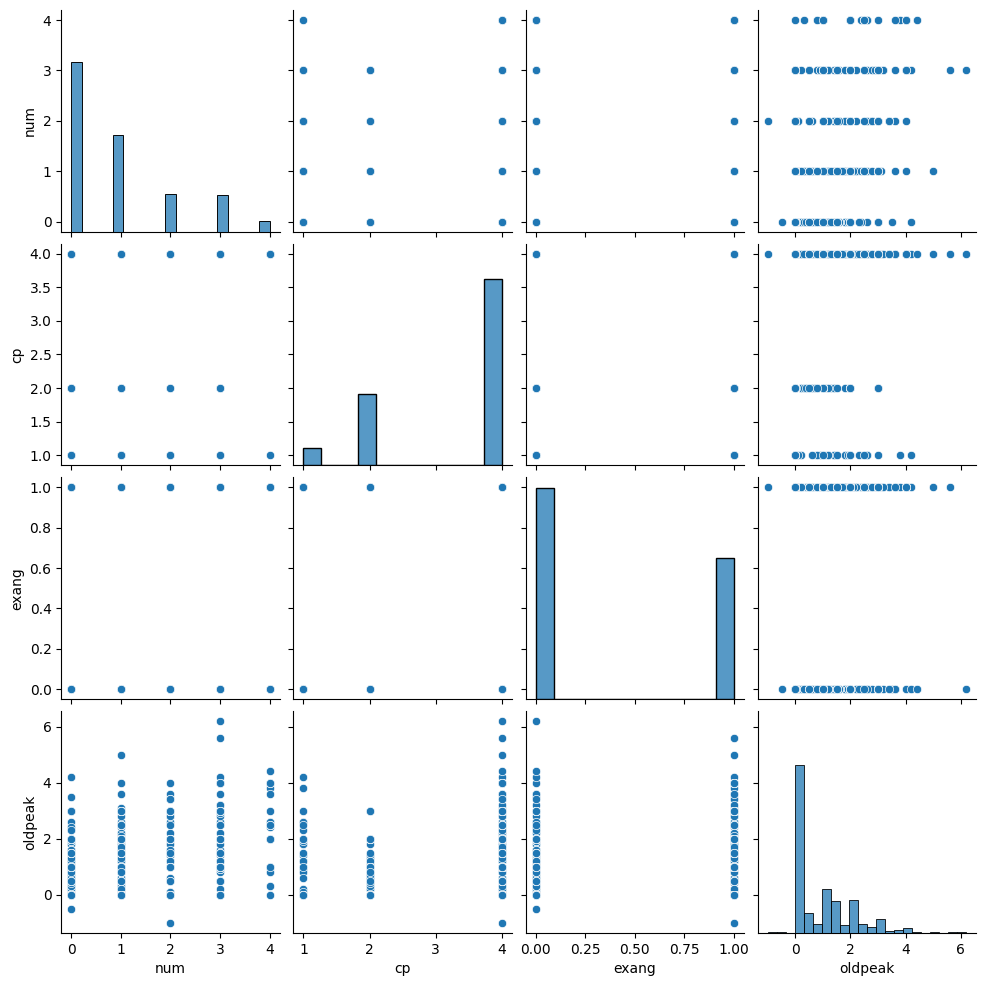

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(df[['num', 'cp','exang', 'oldpeak']])
plt.show()

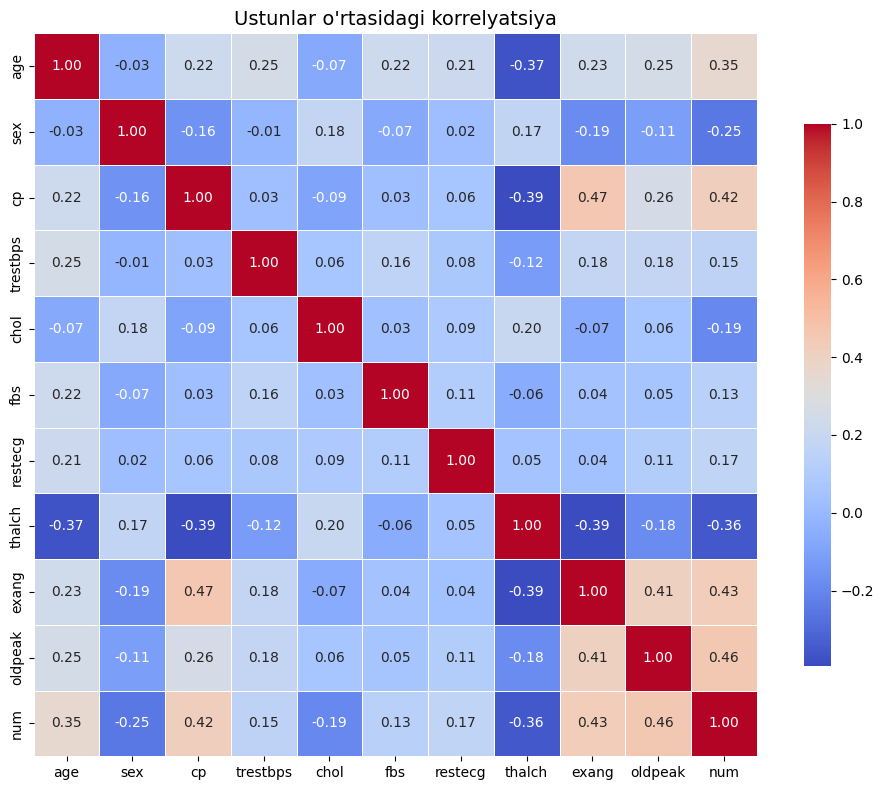

In [ ]:
corr_matrix = df.corr()

# Heatmap чизиш
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,           # Қийматларни кўрсатиш
    cmap='coolwarm',      # Ранглар палитраси
    fmt=".2f",            # Иккилик разрядда
    square=True,          # Қутиларни квадрат қилиш
    linewidths=0.5,       # Қаторлар орасида чизиqlar
    cbar_kws={"shrink": 0.75}  # Ранг шкаласи кичикроқ
)
plt.title("Ustunlar o'rtasidagi korrelyatsiya", fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'num'],
      dtype='object')

<Axes: xlabel='num', ylabel='age'>

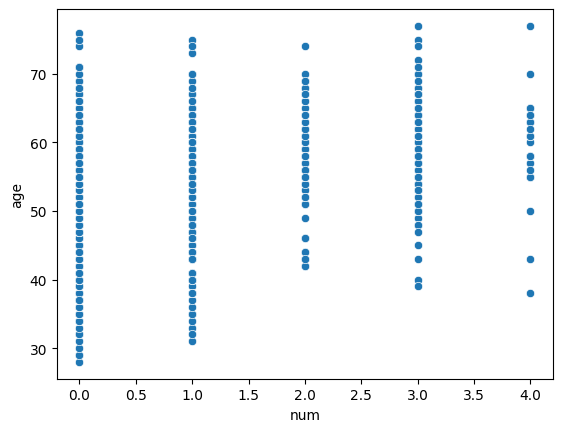

In [ ]:
sns.scatterplot(df, x='num', y='age')

In [ ]:
#Shu ustun asosida simple linear regression modeli tuzing.

from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.1, random_state=42)

In [ ]:
from sklearn import linear_model
L_model = linear_model.LinearRegression()

x_train = np.asanyarray(train_set['oldpeak']).reshape(-1, 1)
y_train = np.asarray(train_set['num'])

In [ ]:
L_model.fit(x_train, y_train)

LinearRegression()

In [ ]:
theta1 = L_model.coef_[0]
theta0 = L_model.intercept_
print(f"{theta1=}")
print(f"{theta0=}")

theta1=np.float64(0.4491964923109785)
theta0=np.float64(0.5215505401311391)


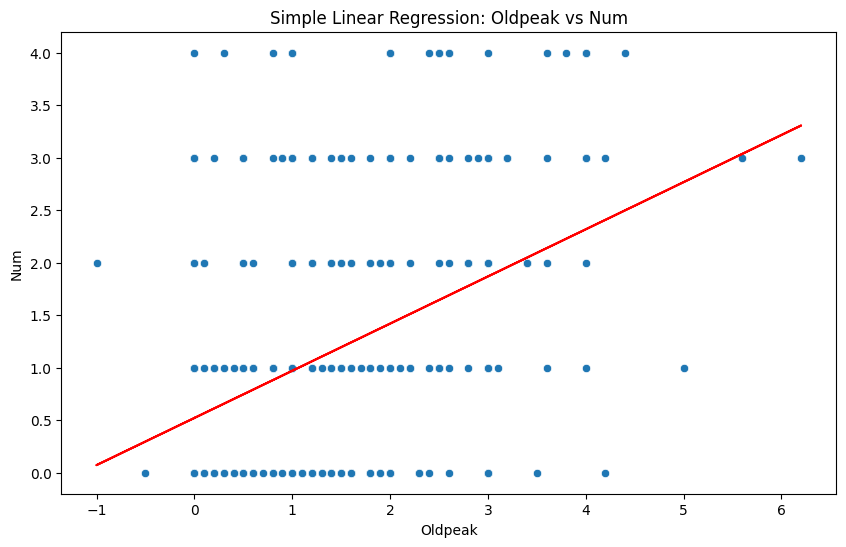

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='oldpeak', y='num')
plt.plot(x_train, theta1*x_train+theta0, color='red')
plt.xlabel('Oldpeak')
plt.ylabel('Num')
plt.title('Simple Linear Regression: Oldpeak vs Num')
plt.show()